# Random Forest 
## Terminologies
- Error: the difference between the actual and predicted values
- Bias: The error of the training data
- Variance: The error of the testing data
- Underfitting: High variance& high Bias
- Overfitting: Low Bias & High variance

Random Forest model falls under the **ensemble technique**: using multiple models/techniques at the same time

## Process in a Random Forest
- Data set
- then we get a **Bootstrap data**
- Then the Bootstrap data is taken into multiple decision trees
- Each decision tree will give an output, and combine all those output into one

_eg of a real life scenario_

One wishes to do a masters degree after a undergraduate, therefore the person will ask many people who did masters (in our case this are the decision trees), and collect all the responses from all those people, then choose the choice that was picked by most of those people asked


_Bootstrap data_ is a copy of original data, then **randomly** picks data from the original data, not necessarily the whole data, and some entries maybe duplicated...and we create multiple of this bootstrap data

Then we proceed to make **decision tree** , then randomly pick a feature, and random number of features and have decsion tree for it...if we had _n_ features in original data, then it will choose _n-1_ as its root nodes..then have the outputs of all those generated decision trees, and pick the winning output, in a majority board section

Because Random forest uses Bootstrap data, this is a **Bagging model**

to see more on Random forest in python look at: _sklearn.ensemble.RandomForestRegressor_ documentation

## Practical exercise

In [1]:
# needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("IceCreamData.csv")

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Data is already cleaned

In [5]:
# assign features and target
# we wish to know how much revenue we would get given the temperature 
x = np.array(df.Temperature)
y = np.array(df.Revenue)

In [7]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
# choose the model selection
from sklearn.ensemble import RandomForestRegressor

In [9]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)

In [10]:
# training the model
regressor.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

C:\Users\Ashraf Mohammed\AppData\Local\Temp\ipykernel_7048\1415045429.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))


RandomForestRegressor(n_estimators=10, random_state=0)

In [11]:
# test the model
y_pred = regressor.predict(x_test.reshape(-1, 1))

In [12]:
pred = pd.DataFrame({"Actual":y_test.reshape(-1),
                    "Prediction":y_pred.reshape(-1)})

In [13]:
pred.head()

,Actual,Prediction
0,250.131728,215.675913
1,660.632289,644.477966
2,10.000000,40.976716
3,634.584751,616.110352
4,653.986736,646.270418


Text(0, 0.5, 'Revenue')

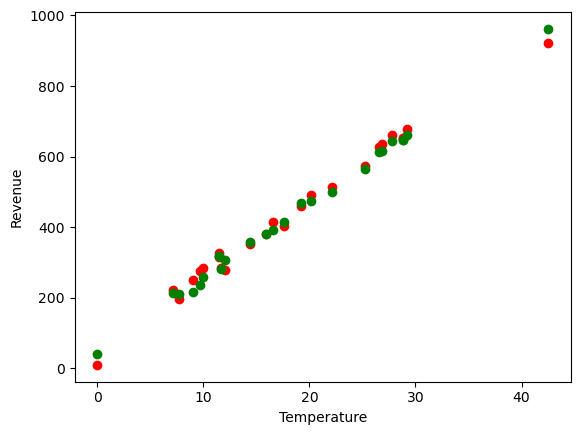

In [14]:
plt.scatter(x_test, y_test, color='red')
plt.scatter(x_test, y_pred, color='green')
plt.xlabel("Temperature")
plt.ylabel("Revenue")

<AxesSubplot:>

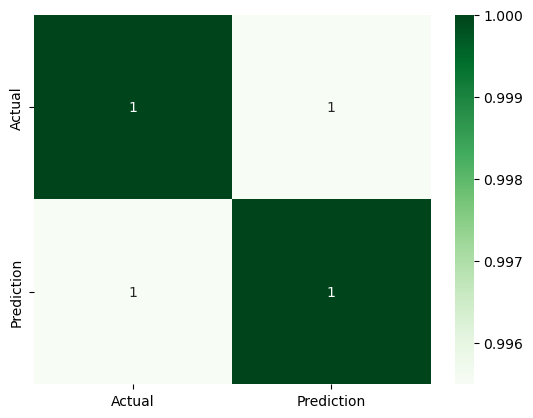

In [15]:
sns.heatmap(pred.corr(), annot=True, cmap='Greens')

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_test, y_pred)

0.9904014460687856

_99% accuracy_ thus Random Forest Regression is a very good model for this problem

No need of hypertuning 

## Project

Data used for this project obtained from: *https://github.com/sahilrahmann/Price_prediction_of_used_Cars_-Predictive_Analysis-/blob/master/cardekho_data.csv*

In [18]:
df = pd.read_csv("cardekho_data.csv")

In [19]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
# EDA, Data exploration, Data manipulation, Data cleaning, Data visualization

In [21]:
df.Fuel_Type.unique()
df.Seller_Type.unique()
df.Transmission.unique()
df.Owner.unique()

array([0, 1, 3], dtype=int64)

In [22]:
df.Fuel_Type.unique()


array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [23]:
df.Seller_Type.unique()


array(['Dealer', 'Individual'], dtype=object)

In [24]:
df.Transmission.unique()


array(['Manual', 'Automatic'], dtype=object)

In [26]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [27]:
df['current_year'] = 2021

In [28]:
df['no_of_year'] = df['current_year'] - df['Year']

In [29]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


### Project is to be able to predict the Price of the car given its Year, Kms Driven, Fuel type , Owner etc

In [30]:
df.Car_Name.unique() # just seeing the different cars we have

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [31]:
# Car name, and others not necessarily affect Price of car and are not categorical form

In [32]:
df.drop(['Car_Name', 'Year', 'current_year'], axis=1, inplace=True)

In [33]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [34]:
# Change the categorical values into numerical form
# Using One-hot encoding
new_df = pd.get_dummies(df)

In [35]:
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,1,0,1,0,0,1


In [36]:
new_df.shape

(301, 12)

They are new columns formed after the One hot encoding, thus the original/previous columns can be deleted without meaning from the dataset being affected

In a column where its value in a row is 0, means its data was not there thus that column can be removed

In [38]:
new_df.drop(['Fuel_Type_CNG', 'Seller_Type_Dealer', 'Transmission_Automatic'], axis=1, inplace=True)

In [39]:
new_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


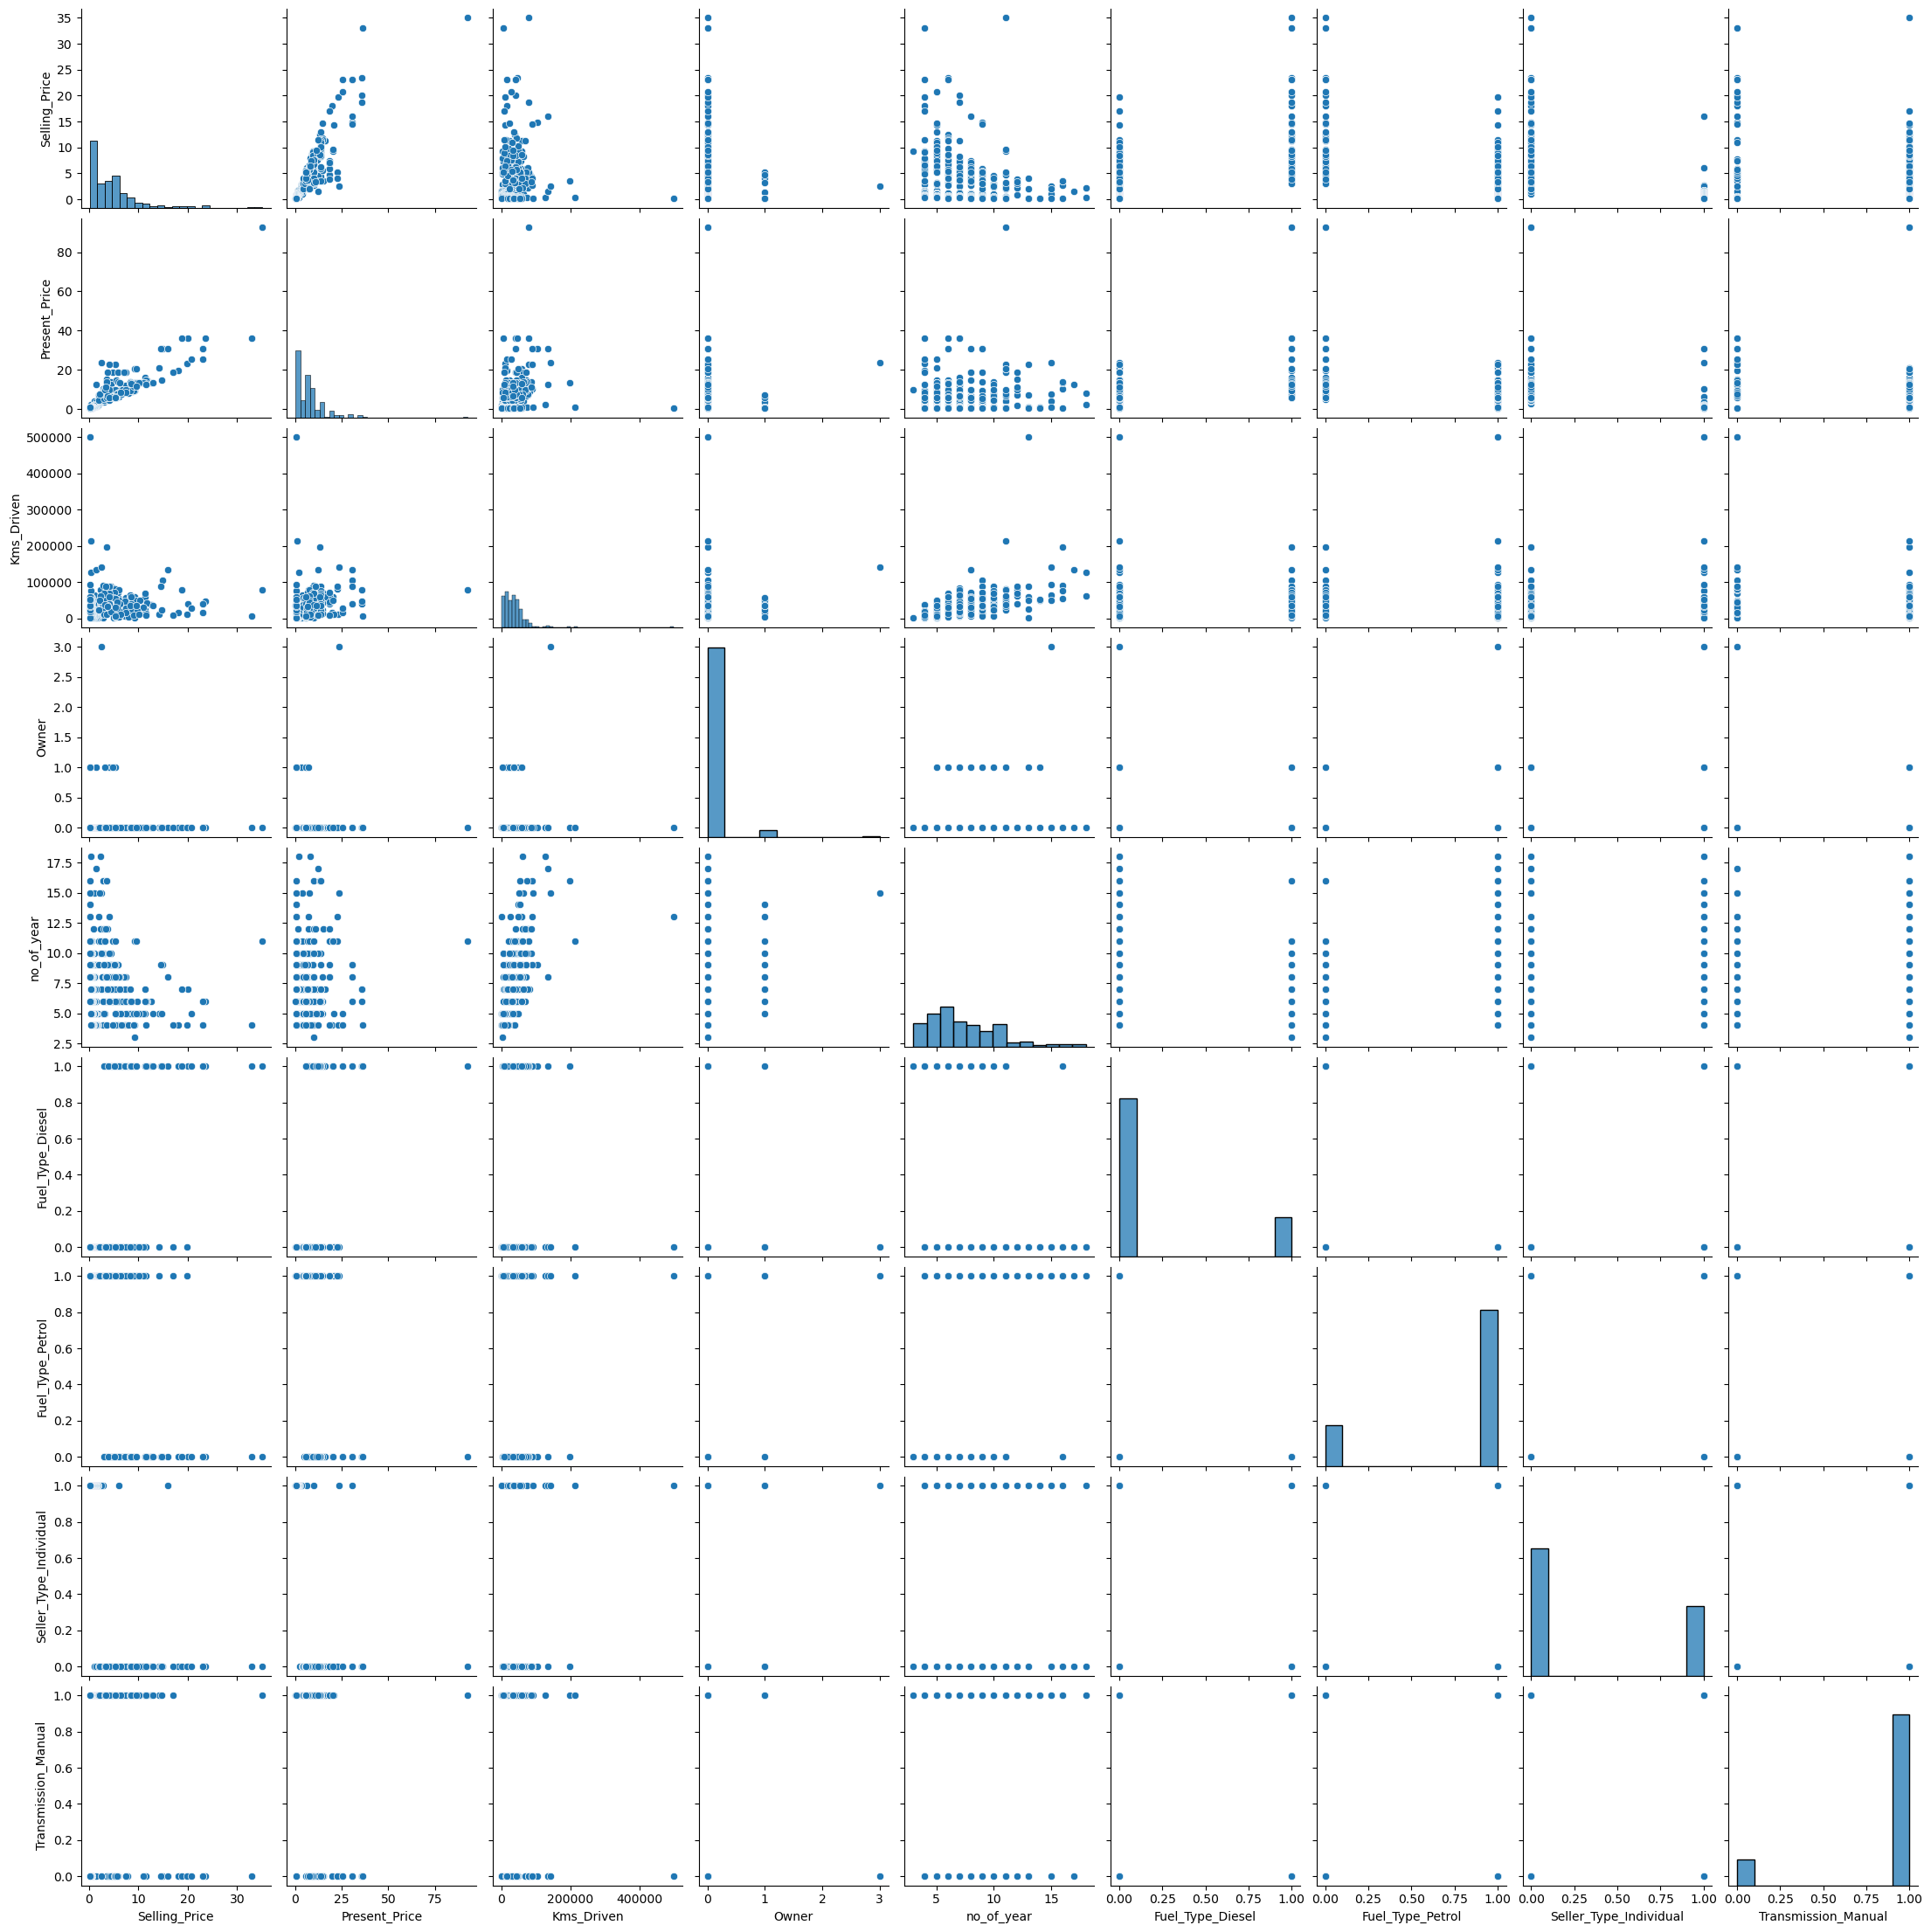

In [43]:
sns.pairplot(new_df)

<AxesSubplot:>

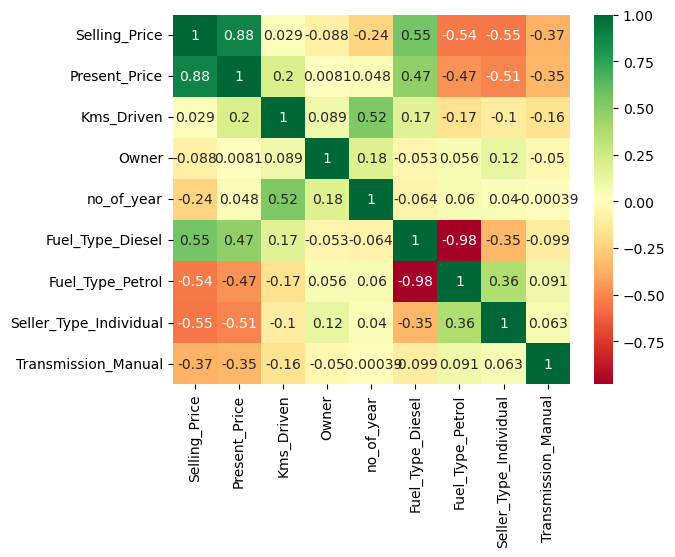

In [42]:
sns.heatmap(new_df.corr(), annot=True, cmap="RdYlGn")

In [49]:
# x = np.array(df.drop('Selling_Price'))
x = np.array(new_df.iloc[:, 1:])
y = np.array(new_df.iloc[:, 0])

In [50]:
x

array([[5.5900e+00, 2.7000e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.5400e+00, 4.3000e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.8500e+00, 6.9000e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.1000e+01, 8.7934e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.2500e+01, 9.0000e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.9000e+00, 5.4640e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [51]:
y

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 23.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       23.5 , 33.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 23.  , 12.5 ,  3.49,  2.5 , 35.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 23.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

In [47]:
# Feature selection
from sklearn.ensemble import ExtraTreesRegressor

In [52]:
model = ExtraTreesRegressor()
feat_importance = model.fit(x, y)

In [53]:
feat_importance.feature_importances_

array([3.84131180e-01, 4.30013147e-02, 3.74788073e-04, 7.65294195e-02,
       2.19614108e-01, 1.52928005e-02, 1.19970222e-01, 1.41086168e-01])

In [57]:
# Feature importance

In [54]:
x = new_df.iloc[:, 1:]
y = new_df.iloc[:, 0]

In [55]:
x

,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,1,0,0,1
297,5.90,60000,0,6,0,1,0,1
298,11.00,87934,0,12,0,1,0,1
299,12.50,9000,0,4,1,0,0,1


In [56]:
model = ExtraTreesRegressor()
feat_importance = model.fit(x, y)

<AxesSubplot:>

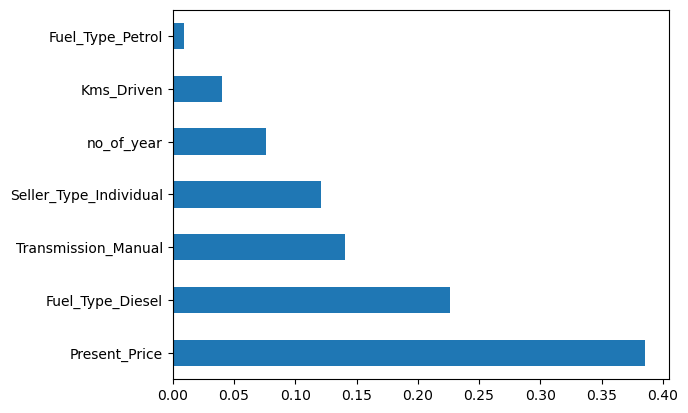

In [59]:
imp = pd.Series(feat_importance.feature_importances_, index=x.columns)
imp.nlargest(7).plot(kind='barh')

The above shows that Present_price has the most effect on the Target we want i.e the Selling Price

In [60]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [61]:
x_train

,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
74,8.93,83000,0,7,1,0,0,1
239,4.43,23709,0,9,0,1,0,1
64,36.23,6000,0,4,1,0,0,0
294,6.80,33019,0,7,0,1,0,1
286,7.90,28569,0,5,0,1,0,1
...,...,...,...,...,...,...,...,...
251,9.90,56701,0,8,0,1,0,1
192,0.75,49000,1,14,0,1,1,1
117,1.90,14000,0,6,0,1,1,1
47,4.15,65000,0,15,0,1,0,1


In [62]:
x_test

,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,9.400,61381,0,6,1,0,0,1
150,0.826,6000,0,10,0,1,1,1
226,5.700,24678,0,6,0,1,0,1
296,11.600,33988,0,5,1,0,0,1
52,19.770,15000,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...
137,0.787,16000,0,8,0,1,1,1
227,4.430,57000,0,10,0,1,0,1
26,5.870,55138,0,8,0,1,0,1
106,3.450,16500,1,7,0,1,1,1


In [63]:
# Model selection
regressor = RandomForestRegressor()

### Hyper-parameter tuning

In [66]:
n_estimators = [int(i) for i in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(i) for i in np.linspace(start=5, stop=30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [68]:
random_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
rf_regressor = RandomizedSearchCV(estimator=regressor,
                                 param_distributions=random_grid,
                                 scoring='neg_mean_squared_error',
                                 cv=5, verbose=2,
                                 random_state=42,
                                 n_jobs=1)

In [71]:
# Tarin the model
rf_regressor.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
rf_regressor.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [73]:
y_pred = rf_regressor.predict(x_test)

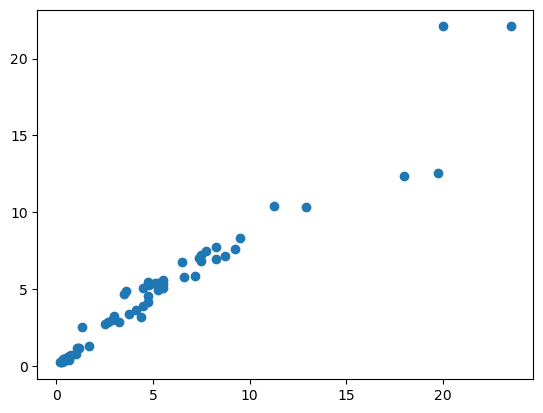

In [74]:
plt.scatter(y_test, y_pred)

In [75]:
finaldf = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

In [76]:
finaldf

,Actual,Predicted
223,8.25,6.989964
150,0.50,0.508103
226,5.25,4.934778
296,9.50,8.354295
52,18.00,12.373994
...,...,...
137,0.65,0.405065
227,2.55,2.761632
26,4.15,3.646689
106,1.35,2.544574


<AxesSubplot:>

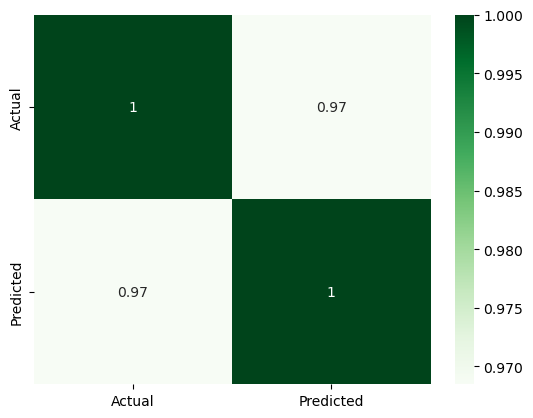

In [77]:
sns.heatmap(finaldf.corr(), annot=True, cmap="Greens")

In [78]:
# Perfomance/ accuracy
r2_score(y_test, y_pred)

0.9236392230173168

This gave a better accuracy as opposed to using Decision Tree which gave _~50% accuracy_ , this model here gave _~92%_

Link to my Project which was done with Decsion Tree: *https://github.com/Habib-Ashraf-Hassan/Decision-tree-project.git* 

But here this higher accuracy was majorly due to the Hyper-parameter tuning